<a href="https://colab.research.google.com/github/ashwinvaswani/Dynamic-Gesture-Recognition/blob/master/code/notebooks/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv3D, MaxPooling3D,Conv2D,AveragePooling2D,AveragePooling3D
from keras.layers import Dense, GlobalAveragePooling3D,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import SGD, RMSprop, Adadelta
from keras.utils import np_utils, generic_utils
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional_recurrent import ConvLSTM2D

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing

import os
import cv2
from tqdm import tqdm
from keras import regularizers

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

drive  sample_data


In [0]:
cd '/content/drive/My Drive/'

/content/drive/My Drive


In [0]:
!tar -xf jesture-resized.tar.xz

In [0]:
# image specification
img_rows,img_cols=64, 64

# Training data
X_tr=[]           # variable to store entire dataset

In [0]:
ls_path = os.path.join("./Pulling Hand In")
listing = os.listdir(ls_path)

for ls in tqdm(listing):
    listing_stop = sorted(os.listdir(os.path.join(ls_path,ls))) 
    frames = []
    img_depth=0
    for imgs in listing_stop:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path,ls),imgs)
            frame = cv2.imread(img)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    X_tr.append(ipt)

print()
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 1500/1500 [01:08<00:00, 21.85it/s]

(16, 64, 64, 3)
1500


In [0]:

ls_path = os.path.join("./Swiping Left")
listing = os.listdir(ls_path)

for ls in tqdm(listing):
    listing_stop = sorted(os.listdir(os.path.join(ls_path,ls))) 
    frames = []
    img_depth=0
    for imgs in listing_stop:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path,ls),imgs)
            frame = cv2.imread(img)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    X_tr.append(ipt)

print()
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 1500/1500 [01:07<00:00, 22.11it/s]

(16, 64, 64, 3)
3000


In [0]:

ls_path = os.path.join("./Swiping Right")
listing = os.listdir(ls_path)

for ls in tqdm(listing):
    listing_stop = sorted(os.listdir(os.path.join(ls_path,ls))) 
    frames = []
    img_depth=0
    for imgs in listing_stop:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path,ls),imgs)
            frame = cv2.imread(img)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    X_tr.append(ipt)

print()
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 1500/1500 [01:08<00:00, 21.00it/s]

(16, 64, 64, 3)
4500


In [0]:

ls_path = os.path.join("./Thumb Up")
listing = os.listdir(ls_path)

for ls in tqdm(listing):
    listing_stop = sorted(os.listdir(os.path.join(ls_path,ls))) 
    frames = []
    img_depth=0
    for imgs in listing_stop:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path,ls),imgs)
            frame = cv2.imread(img)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    X_tr.append(ipt)

print()
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 1500/1500 [01:07<00:00, 17.25it/s]

(16, 64, 64, 3)
6000


In [0]:
ls_path = os.path.join("./No gesture")
listing = os.listdir(ls_path)

for ls in tqdm(listing):
    listing_stop = sorted(os.listdir(os.path.join(ls_path,ls))) 
    frames = []
    img_depth=0
    for imgs in listing_stop:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path,ls),imgs)
            frame = cv2.imread(img)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    X_tr.append(ipt)

print()
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 1500/1500 [02:44<00:00,  5.89it/s]

(16, 64, 64, 3)
7500


In [0]:
X_tr_array = np.array(X_tr)   # convert the frames read into array

num_samples = len(X_tr_array) 
print (num_samples)

7500


In [0]:
label=np.ones((num_samples,),dtype = int)
label[0:1500]= 0
label[1500:3000] = 1
label[3000:4500] = 2
label[4500:6000] = 3
label[6000:7500] = 4


In [0]:
img_depth = 16
train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

train_set = np.zeros((num_samples, img_depth, img_cols,img_rows,3))

for h in range(num_samples):
    train_set[h][:][:][:][:]=X_train[h,:,:,:]
  

patch_size = 16    # img_depth or number of frames used for each gesture

print(train_set.shape, 'train samples')

X_Train shape: (7500, 16, 64, 64, 3)
(7500, 16, 64, 64, 3) train samples


In [0]:
# CNN Training parameters

num_classes = 5
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, num_classes)

# Pre-processing
train_set = train_set.astype('float32')
print(np.mean(train_set))
train_set -= np.mean(train_set)
print(np.max(train_set))
train_set /=np.max(train_set)

108.26149
146.73851


In [0]:
#low resolution network
weight_decay = 0.005

model = Sequential()
model.add(MaxPooling3D(pool_size=(1, 2, 2),input_shape=(patch_size, 64, 64, 3)))

model.add(Conv3D(8,(5,5,5),activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))

model.add(Conv3D(32,(3,5,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
# model.add(Conv3D(64,(3,3,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(MaxPooling3D(pool_size=(1, 1, 4 )))



#model.add(Conv3D(128,3,3,3, activation='relu'))
#model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),border_mode='valid'))
#model.add(BatchNormalization())

model.add(Flatten())
#model.add(GlobalAveragePooling3D())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(num_classes,kernel_initializer='normal',kernel_regularizer=regularizers.l2(weight_decay)))

model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling3d_9 (MaxPooling3 (None, 16, 32, 32, 3)     0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 12, 28, 28, 8)     3008      
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 12, 14, 14, 8)     0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 10, 10, 10, 32)    19232     
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 5, 5, 5, 32)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [0]:
import os
save_dir = os.path.join(os.getcwd(),'saved_model')
print(os.getcwd())
model_name = "3DCNN_jester_84"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor = 'val_acc', 
                            save_best_only=True, verbose=1)
#earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=50, verbose =1)

sgd = SGD(lr=0.005,  momentum=0.9, nesterov=False)
rms = RMSprop(decay=1e-6)
ada = Adadelta(lr=0.1,decay=1e-6)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['acc'])
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(train_set, Y_train, test_size=0.2, random_state=20)

batch_size = 32
num_epoch =200
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.05, 
                               cooldown=0, patience=10, min_lr=0.005/(2^4),verbose=1)

/content/drive/My Drive


In [0]:
hist = model.fit(
    X_train_new,
    y_train_new,
    validation_data=(X_val_new,y_val_new),
    batch_size=batch_size,
    epochs = num_epoch,
    shuffle=True,
    callbacks=[checkpoint,lr_reducer]
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6000 samples, validate on 1500 samples
Epoch 1/200





6000/6000 [==============================] - 29s 5ms/step - loss: 7.4476 - acc: 0.2082 - val_loss: 6.9026 - val_acc: 0.2207

Epoch 00001: val_acc improved from -inf to 0.22067, saving model to /content/drive/My Drive/saved_model/3DCNN_LRN_112_6_jester
Epoch 2/200
6000/6000 [==============================] - 10s 2ms/step - loss: 6.3277 - acc: 0.3898 - val_loss: 5.6980 - val_acc: 0.5427

Epoch 00002: val_acc improved from 0.22067 to 0.54267, saving model to /content/drive/My Drive/saved_model/3DCNN_LRN_112_6_jester
Epoch 3/200
6000/6000 [==============================] - 10s 2ms/step - loss: 5.2507 - acc: 0.5612 - val_loss: 4.7429 - val_acc: 0.6447

Epoch 00003: val_acc improved from 0.54267 to 0.64467, saving model to /content/drive/My Drive/saved_model/3DCNN_LRN_112_6_jester
Epoch 4/200
6000/6000 [=============================

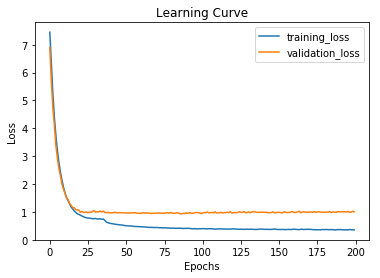

In [0]:
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

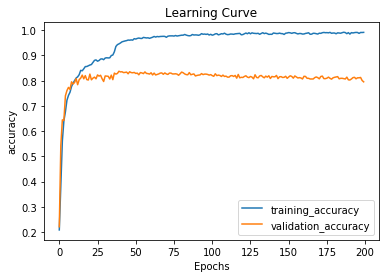

In [0]:
training_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [0]:
from keras.models import Model, load_model
model1_name = "3DCNN_jester_84"
model1_path = os.path.join(save_dir, model1_name)
model1 = load_model(model1_path)

In [0]:
test_pred =model1.predict(X_train_new[50:70])
result = np.argmax(test_pred, axis =1)
print(result)

[0 1 1 1 4 0 3 1 2 1 2 1 4 4 1 0 1 3 4 4]


In [0]:
img_array = X_train_new[50]

In [0]:
from sklearn.metrics import confusion_matrix
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model1.predict(X_val_new),axis =1))
print(met)

[[210  26  13  31   9]
 [ 23 241   9  11  14]
 [  6   8 285   6  10]
 [ 38  14  12 228   7]
 [  1   1   2   3 292]]


In [0]:
import itertools
def confusion_matrix_plot(cm, classes, 
                          title='Normalized Confusion Matrix', 
                          normalize=True, 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


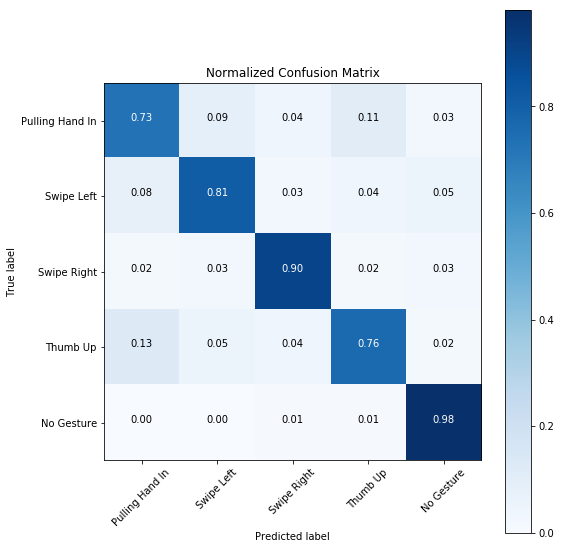

In [0]:
confusion_matrix_plot(met, classes=['Pulling Hand In', 'Swipe Left', 'Swipe Right', 'Thumb Up','No Gesture'])


In [0]:
from keras.models import Model, load_model
model2_name = "3DCNN_LRN_112_6_jester"
model2_path = os.path.join(save_dir, model2_name)
model2 = load_model(model2_path)

In [0]:
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model1.predict(X_val_new)+model2.predict(X_val_new),axis =1))
print(met)

[[210  26  13  31   9]
 [ 23 241   9  11  14]
 [  6   8 285   6  10]
 [ 38  14  12 228   7]
 [  1   1   2   3 292]]
